In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

<Axes: xlabel='0', ylabel='1'>

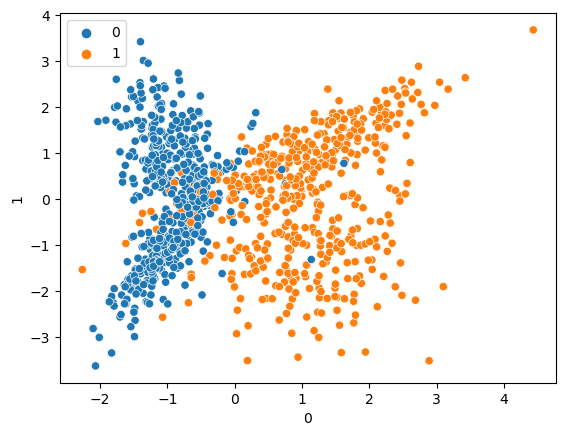

In [7]:
sns.scatterplot(x = pd.DataFrame(X)[0],y= pd.DataFrame(X)[1],hue=y)

In [10]:
### dataset splitting into training and testing model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC(kernel='linear')

In [14]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
svc.coef_

array([[ 2.47648161, -0.41055417]])

In [16]:
y_pred = svc.predict(X_test)

In [17]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0])

In [18]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [20]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[100  10]
 [  5  85]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       110
           1       0.89      0.94      0.92        90

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

0.925


### Hyperarameter Tunning With SVC

In [22]:
from sklearn.model_selection import GridSearchCV

parameter = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.001,0.0001]
}

In [23]:
grid = GridSearchCV(SVC(),param_grid= parameter , refit=True,cv = 5, verbose=3)

In [24]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.938 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.938 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.925 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.956 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.944 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.931 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.919 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.925 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.963 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.938 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.688 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [26]:
y_grid_pred = grid.predict(X_test)

In [27]:
print(confusion_matrix(y_grid_pred,y_test))
print(classification_report(y_grid_pred,y_test))
print(accuracy_score(y_grid_pred,y_test))

[[101  10]
 [  4  85]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       111
           1       0.89      0.96      0.92        89

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

0.93
